### Genetic algorithm

Implement a genetic algorithm (GA) with focus on the understanding the dynamics of artificial evolution through crossover, mutation, and selection mechanisms. The GA, designed in Python, simulates the evolutionary process by evolving a population of genomes over generation.

In [1]:
## Utilities

import numpy as np
import random
import math
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn import svm

#### MNIST dataset

In [2]:
## Import the data
mnist = fetch_openml('mnist_784')

c:\Documents\Sussex_Files\Semester_1\Artificial_Life\Final_Project\Codes\ALifeProject\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.target.shape

(70000,)

In [4]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

#### Dividing the dataset into training data and test data

In [5]:
## np.random.permutation create an array of random numbers in the range 0 to 10000
index_number= np.random.permutation(5000)
## Use the index_numer variable to select the random positions in the dataset
x1, y1 = mnist.data.loc[index_number], mnist.target.loc[index_number]
## Reset the index, now the index are from 0 to 10000
x1.reset_index(drop = True,inplace = True)
y1.reset_index(drop = True,inplace = True)
## Assing some the first 7000 values to x and y train and the rest to x and y test
x_train , x_test = x1[:4000], x1[4000:]
y_train , y_test = y1[:4000], y1[4000:]

In [6]:
print("printing the count of infinity values") 

count = np.isinf(x_train).values.sum() 
print("x_train contains " + str(count) + " infinite values") 

count2 = np.isinf(x_test).values.sum() 
print("x_test contains " + str(count2) + " infinite values") 

count3 = x_train.isnull().sum().sum()
print('Number of NaN values present in x_train: ' + str(count3))

count4 = x_test.isnull().sum().sum()
print('Number of NaN values present in x_test: ' + str(count4))

count5 = y_train.isnull().sum().sum()
print('Number of NaN values present in y_train: ' + str(count5))

count6 = y_train.isnull().sum().sum()
print('Number of NaN values present in y_test: ' + str(count6))

printing the count of infinity values
x_train contains 0 infinite values
x_test contains 0 infinite values
Number of NaN values present in x_train: 0
Number of NaN values present in x_test: 0
Number of NaN values present in y_train: 0
Number of NaN values present in y_test: 0


### Create the population

In [7]:
## Create population - Possible solution

## Precomputed not use because needs an square matrix to work and it is not given in this experiment
## Hyperparameter selected for tuning and optimization
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
kernel = [1, 2, 3, 4]
C = np.arange(0.5, 15, 0.5)
degree = np.arange(1, 10, 1)
# gamma = ['scale', 'auto']
gamma = [1, 2]
coef0 = np.arange(0, 1, 0.05)
pop_size = 5
random.seed(1997)

In [8]:
def create_random_hyperparameters_set(my_kernel, my_C, my_degree, my_gamma, my_coef0, p_size):
    """
        Create random hyperparameters set. Uses the pre defined hyperparameters to create randomly the first genotype
        :param kernel: List with the possible kernels
        :param C: possible C values
        :param degree: possible degree values
        :param gamma: list with the gamma possibilities. 'scalar' or 'auto'
        :param coef0: possible coef0 values

        :return: list with random values for the SVM algorithm
    """
    population = []
    ## Create the output list
    for i in range(p_size):
        hyper_params = [random.choice(my_kernel), random.choice(my_C), random.choice(my_degree), random.choice(my_gamma), round(random.choice(my_coef0), 2)]
        population.append(hyper_params)

    return population

def get_svm_fitness_GA(genotype):
    """
        Creates the SVM model, train and test the model to get the fitness
        :param genotype: List with the hyperpameters - Kernel, C, degree, gamma and coef0
        :return: SVC F1 Score
    """
    ## Re-build the hyperparams
    ## Assign the kernel
    # print(type(genotype[0]))
    temp_geno = list(genotype.copy())
    if temp_geno[0] == 1:
        temp_geno[0] = 'linear'

    elif temp_geno[0] == 2:
        # print("type temp_geno: ", type(temp_geno))
        temp_geno[0] = 'poly'

    elif temp_geno[0] == 3:
        temp_geno[0] = 'rbf'

    elif temp_geno[0] == 4:
        temp_geno[0] = 'sigmoid'

    ## Assign the gamma
    if temp_geno[3] == 1:
        temp_geno[3] = 'scale'

    elif temp_geno[3] == 2:
        temp_geno[3] = 'auto'

    my_svc = svm.SVC(kernel=temp_geno[0], C=temp_geno[1], degree=int(temp_geno[2]), gamma=temp_geno[3], coef0=temp_geno[4])
    my_svc.fit(x_train,y_train)
    my_result=my_svc.predict(x_test)
    my_f1_score = f1_score(y_test, my_result, average='micro')
    if math.isinf(my_f1_score):
        my_f1_score = 0.99999999
        return my_f1_score
    # print('Accuracy :',accuracy_score(y_test,my_result))
    # print(classification_report(y_test,result))
    # print(f'F1 Score: {my_f1_score}')
    return my_f1_score

def get_population_fitnesses(population):
    """
        Calculates the fitness for each solution
        :param population: List that contains the possible solutions randomly generated
        :return: The fitness (F1 score) for each solution
    """
    pop_fitness = []
    for solution in population:
        ## Fitness is the F1 score of the solution
        # print(f"solution: {solution}")
        solution_fitness = round(get_svm_fitness_GA(solution), 2)
        pop_fitness.append(solution_fitness)
    return pop_fitness

In [9]:
# pop_test = create_random_hyperparameters_set(my_kernel=kernel, my_C=C, my_degree=degree, my_gamma=gamma, my_coef0=coef0, p_size=pop_size)
# type(pop_test)

In [10]:
# geno = [3, 5.5, 1, 1, 0.35]
# pop_fitness_test = get_svm_fitness_GA(geno)
# pop_fitness_test

In [17]:
## Basic GA rank selection

pop_size = 8
n_generations = 1     ##250
n_genes = 5
mutation_rate = 1/n_genes
crossover = True
mutate = True
kernel_mutation_prob = 0.05

fitness_over_time = []
fitnesses_over_time = []
pops_over_time = []

## Initialise population of genomes
population_hyper_params = create_random_hyperparameters_set(my_kernel=kernel, my_C=C, my_degree=degree, my_gamma=gamma, my_coef0=coef0, p_size=pop_size)
for i, j in enumerate(population_hyper_params):
    print(i, j)

0 [2, 7.5, 8, 2, 0.65]
1 [3, 11.0, 3, 2, 0.3]
2 [1, 4.5, 4, 1, 0.05]
3 [2, 4.0, 6, 1, 0.7]
4 [1, 3.0, 9, 1, 0.3]
5 [3, 12.5, 1, 1, 0.35]
6 [2, 6.5, 5, 2, 0.2]
7 [3, 10.0, 8, 1, 0.4]


In [18]:
## Get the initial population fitnesses
population_fitnesses = get_population_fitnesses(population_hyper_params)
for i, j in enumerate(population_fitnesses):
    print(i, j)

0 0.81
1 0.11
2 0.91
3 0.94
4 0.91
5 0.95
6 0.9
7 0.95


fitness_ranks: [1 0 6 2 4 3 5 7]
Selection scale: [ 0  1  3  6 10 15 21 28]
max_val: 28
random_val_1: 1.564876634480862
selection_scale: 3
parent_1_genes: [1, 4.5, 4, 1, 0.05]
parent_1_fitness: 0.91
j: 2
parent_1_genome_index: 6
random_val_1: 17.172620916643158
selection_scale: 21
parent_1_genes: [2, 6.5, 5, 2, 0.2]
parent_1_fitness: 0.9
j: 6
parent_1_genome_index: 5
random_val_1: 27.7576562303622
selection_scale: 28
parent_1_genes: [3, 10.0, 8, 1, 0.4]
parent_1_fitness: 0.95
j: 7
parent_1_genome_index: 7
random_val_1: 17.75847605368863
selection_scale: 21
parent_1_genes: [2, 6.5, 5, 2, 0.2]
parent_1_fitness: 0.9
j: 6
parent_1_genome_index: 5
random_val_1: 3.6423770167640317
selection_scale: 6
parent_1_genes: [2, 4.0, 6, 1, 0.7]
parent_1_fitness: 0.94
j: 3
parent_1_genome_index: 2
random_val_1: 9.116427044868889
selection_scale: 10
parent_1_genes: [1, 3.0, 9, 1, 0.3]
parent_1_fitness: 0.91
j: 4
parent_1_genome_index: 4
random_val_1: 15.307995598232699
selection_scale: 21
parent_1_genes

Text(0.5, 1.0, 'Best individual performance')

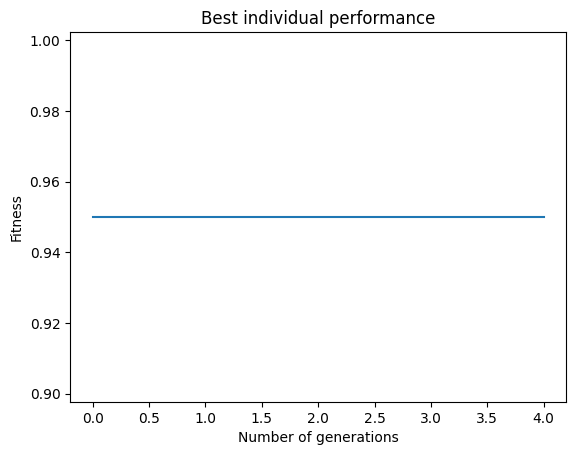

In [21]:
initial_top_fitness = max(population_fitnesses)
fitness_over_time.append(initial_top_fitness)

pops_over_time.append(population_hyper_params)

for generation in range(n_generations):
    ## Create new population variable to store the new individuals(possible solutions)
    new_pop = np.zeros((pop_size, n_genes))
    # new_pop = np.zeros((pop_size, n_genes), dtype=object)
    ## Get fitness  - Index of the best solutions from the worst to best performance
    ## [9 3 4 6 17 1 10 ...]
    fitness_ranks = np.argsort(population_fitnesses)
    # print(f"fitness_ranks: {fitness_ranks}")
    selection_scale = np.cumsum(range(pop_size))
    # print(f"Selection scale: {selection_scale}")
    max_val = max(selection_scale)
    # print(f"max_val: {max_val}")

    ## Rank selection for two parent
    for i in range(0, pop_size):
        ## Generate a random number for selection
        ## random.uniform select a random value all with the same probabilities
        random_val_1 = np.random.uniform(0, max_val)
        # print(f"random_val_1: {random_val_1}")
        ## Find the best pared based on the wheel
        for j in range(pop_size):
            # print(f"selection scale before loop: {selection_scale[j]}")
            if random_val_1 <= selection_scale[j]:
                # print(f"selection_scale: {selection_scale[j]}")
                parent_1_genome_index = fitness_ranks[j]
                # print(f"parent_1_genes: {population_hyper_params[j]}")
                # print(f"parent_1_fitness: {population_fitnesses[j]}")
                # print(f"j: {j}")
                # print(f"parent_1_genome_index: {parent_1_genome_index}")
                break

        ## Ensure that parent_2 is different from parent_1
        parent_2_genome_index = None
        # while parent_2_genome_index is None:
        while parent_2_genome_index is None or parent_2_genome_index == parent_1_genome_index:

            random_val_2 = np.random.uniform(0, max_val)
            # print(f"random_val_2: {random_val_2}")

            for j in range(pop_size):
                if random_val_2 <= selection_scale[j]:
                    parent_2_genome_index = fitness_ranks[j]
                    # print(f"parent_2_genome_index: {parent_2_genome_index}")
                    break

        if crossover:
            ## Implement random crossover - Create child from crossover
            cross_over_point = np.random.choice(range(n_genes))
            # print(f"Crossover point: {cross_over_point}")
            # print(f"Parent one genes: {population_hyper_params[parent_1_genome_index]}")
            # print(f"Parent two genes: {population_hyper_params[parent_2_genome_index]}")

            parent_1_genes_share = population_hyper_params[parent_1_genome_index][0:cross_over_point]
            parent_2_genes_share = population_hyper_params[parent_2_genome_index][cross_over_point:]
            # print(f"paren_1_genes_share: {parent_1_genes_share}")
            # print(f"paren_2_genes_share: {parent_2_genes_share}")

            child = np.hstack([parent_1_genes_share, parent_2_genes_share])

        if mutate:
            ## Implement mutation
            for gene_no in range(n_genes):
                if np.random.rand() < mutation_rate:
                    if gene_no == 0 and np.random.rand() < kernel_mutation_prob:
                        child[gene_no] = random.choice(kernel)
                    elif gene_no == 1:
                        child[gene_no] = random.choice(C)
                    elif gene_no == 2:
                        child[gene_no] = random.choice(degree)
                    elif gene_no == 3 and np.random.rand() < kernel_mutation_prob:
                        child[gene_no] = random.choice(gamma)
                    elif gene_no == 4:
                        child[gene_no] = random.choice(coef0)

        # print(f"New child: {child}")
        # print("i_pop", i)
        new_pop[i, :] = child.copy()
        # print(f"new_pop_type: ", type(new_pop))
        # print(f"new_pop: ",  new_pop)
    print("Generation: ", generation)
    new_pop_fitnesses = get_population_fitnesses(new_pop)
    new_pop_best_fitness = max(new_pop_fitnesses)
    print("new_pop_best_fitness: ", new_pop_best_fitness)
    new_pop_best_fitness_pos = np.where(new_pop_fitnesses == new_pop_best_fitness)[0][0]
    new_pop_best_params = new_pop[new_pop_best_fitness_pos]
    print("Best current solution: ", new_pop_best_params)
    print("-------------------------------------------")
    fitness_over_time.append(new_pop_best_fitness.copy())

plt.plot(fitness_over_time)
plt.xlabel("Number of generations")
plt.ylabel("Fitness")
plt.title("Best individual performance")

In [14]:
# import numpy as np

# my_array = np.array([10, 20, 30, 40, 50])

# # Find the indices of the element 30
# indices_of_30 = np.where(my_array == 30)[0]

# print("Indices of 30:", indices_of_30)

In [15]:
# new_pop_best_fitness_pos = np.where(new_pop_fitnesses == new_pop_best_fitness)[0][0]
# new_pop_best_fitness_pos

In [16]:
# new_pop_best_params = new_pop[new_pop_best_fitness_pos]
# new_pop_best_params